# Goals
With the sample dataset from Parkway Pantai, create a predictive model that can accurately classify individuals as either __having__ or __not having__ heart disease.<br><br>
In this notebook will look at relationship analysis and modelling.
<br><br>
_Dataset was provided by NTUC Learning Hub as part of the SCTP Data Analyst Course Capstone Project_<br>
_Additionally, this resembles the [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) on kaggle._
***

# Contents

- [Libraries](#s1)
- [Import Data](#s2)
- [Understanding the Data](#s3)
    - [Data Distribution](#s4)
    - [Correlation](#s5)
- [Split Data](#s6)
- [Train & Test models](#s7)
    - [Logistical Regression](#s9)
    - [k-Nearest Neighbor](#s10)
    - [Support Vector Machine](#s11)
    - [Decision Tree Classifier](#s12)
    - [Random Forest](#s13)
    - [Gaussian Naive Bayes](#s14)
- [Compare the models](#s15)


# Libraries <a id="s1"></a>
Let's first import our basic required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics


import sqlalchemy
from sqlalchemy import text
from sqlalchemy import select



# Import data <a id="s2"></a>
Import the data from postgresql server using `sqlalchemy`

In [2]:
engine = sqlalchemy.create_engine(url)

In [3]:
sql = '''
    SELECT * FROM cardio_clean;
'''
with engine.connect() as conn:
    query = conn.execute(text(sql))         
og_df = pd.DataFrame(query.fetchall())

In [4]:
df = og_df

# Understanding the Data <a id="s3"></a>

In [5]:
df.head(10)

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,smoke,disease,bmi,C_India,C_Indonesia,C_Malaysia,C_Singapore
0,1,50,0,110,80,1,2,1,0,0,21.97,0,1,0,0
1,1,55,0,140,90,3,1,1,0,1,34.93,0,0,1,0
2,0,51,0,130,70,3,1,1,0,1,23.51,0,1,0,0
3,1,48,0,150,100,1,2,1,0,1,28.71,0,0,0,1
4,0,47,0,100,60,1,1,1,0,0,23.01,0,0,0,1
5,0,60,0,120,80,2,1,2,0,0,29.38,0,1,0,0
6,1,60,0,130,80,3,1,1,0,0,37.73,0,0,1,0
7,1,61,0,130,90,3,2,3,0,1,29.98,0,0,1,0
8,1,48,0,110,70,1,1,1,0,0,28.44,1,0,0,0
9,0,54,0,110,60,1,1,1,0,0,25.28,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67241 entries, 0 to 67240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   active       67241 non-null  int64  
 1   age          67241 non-null  int64  
 2   alco         67241 non-null  int64  
 3   ap_hi        67241 non-null  int64  
 4   ap_lo        67241 non-null  int64  
 5   cholesterol  67241 non-null  int64  
 6   gender       67241 non-null  int64  
 7   gluc         67241 non-null  int64  
 8   smoke        67241 non-null  int64  
 9   disease      67241 non-null  int64  
 10  bmi          67241 non-null  float64
 11  C_India      67241 non-null  int64  
 12  C_Indonesia  67241 non-null  int64  
 13  C_Malaysia   67241 non-null  int64  
 14  C_Singapore  67241 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 7.7 MB


In [7]:
df.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,smoke,disease,bmi,C_India,C_Indonesia,C_Malaysia,C_Singapore
count,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000,67241.000000
mean,0.802948,52.840573,0.052974,126.323151,81.012983,1.362799,1.348180,1.225294,0.087372,0.493122,27.469126,0.248569,0.249684,0.249357,0.252391
std,0.397775,6.764790,0.223983,16.003657,8.893059,0.677642,0.476397,0.571716,0.282382,0.499956,5.019623,0.432186,0.432833,0.432644,0.434387
min,0.000000,29.000000,0.000000,60.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,48.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,0.000000,23.880000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,53.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,0.000000,26.370000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,58.000000,0.000000,140.000000,90.000000,1.000000,2.000000,1.000000,0.000000,1.000000,30.120000,0.000000,0.000000,0.000000,1.000000
max,1.000000,64.000000,1.000000,240.000000,100.000000,3.000000,2.000000,3.000000,1.000000,1.000000,54.010000,1.000000,1.000000,1.000000,1.000000


## Data Distribution <a id="s4"></a>

In [8]:
df['disease'].value_counts()

0    34083
1    33158
Name: disease, dtype: int64

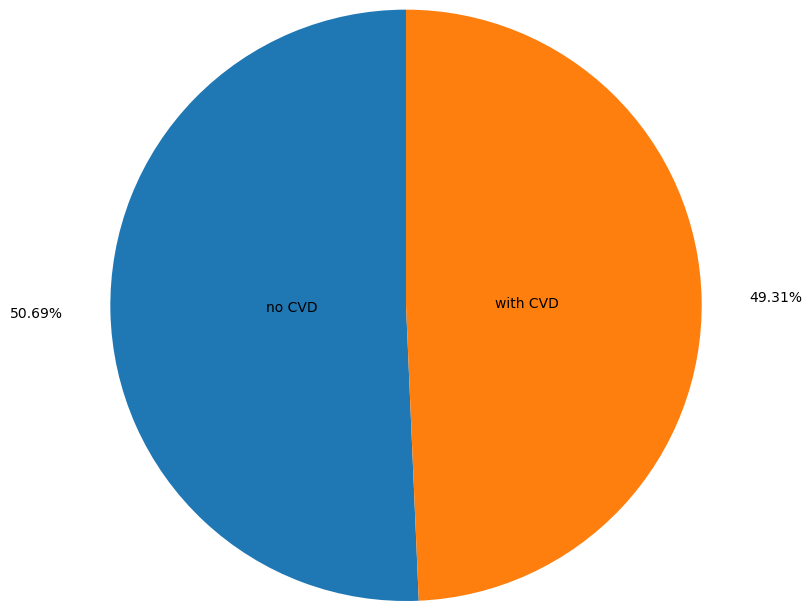

In [9]:
fig, ax = plt.subplots()
plt.pie(df['disease'].value_counts(), labels=['no CVD','with CVD'],autopct='%.2f%%',pctdistance=1.25,labeldistance=.3,radius=2,startangle=90)
plt.show()

Distribution of data between those with and without CVD is even.

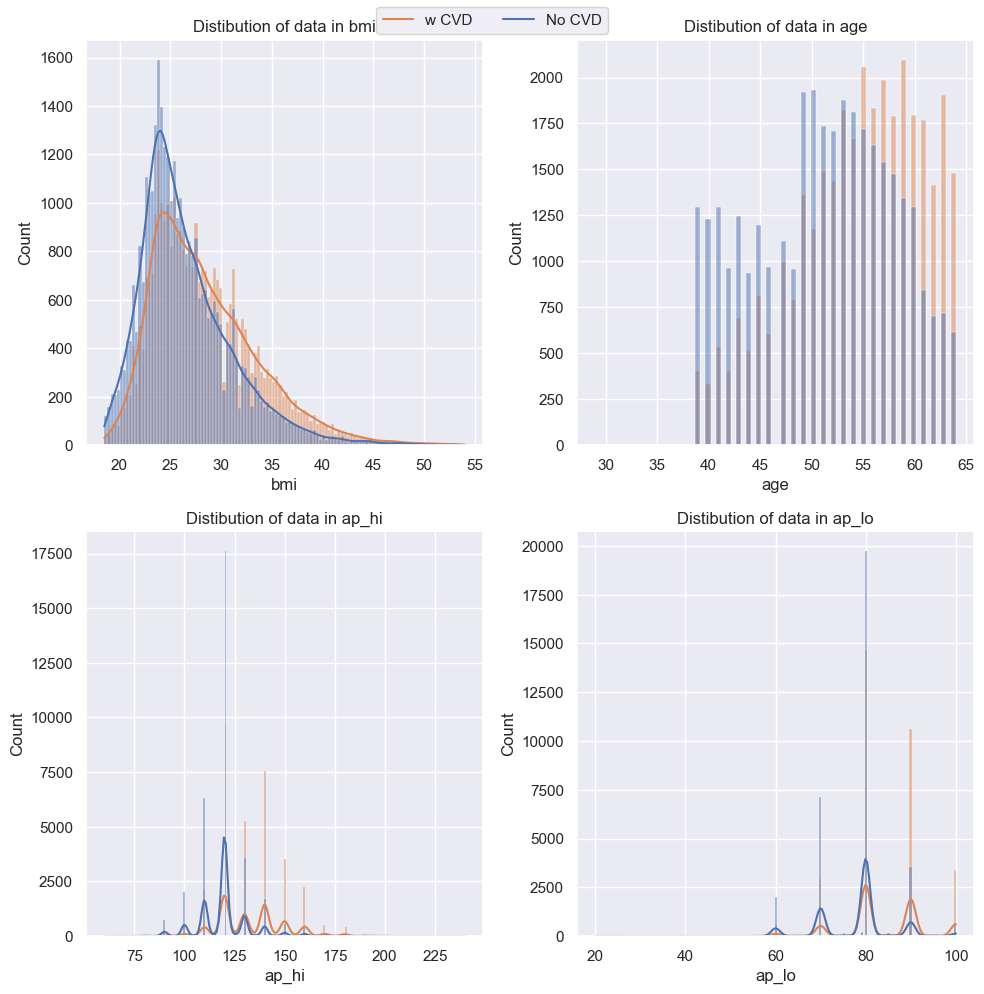

In [10]:
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2,2, figsize=(10,10))
labels =["w CVD","No CVD"]

h1 = sns.histplot(x=df['bmi'], kde=True, hue=df['disease'], ax=axes[0,0],legend=False)
axes[0,0].set_title("Distibution of data in bmi")

h2 = sns.histplot(x=df['age'], hue=df['disease'],ax=axes[0,1],legend=False)
axes[0,1].set_title("Distibution of data in age")

h3 = sns.histplot(x=df['ap_hi'], kde=True, hue=df['disease'],ax=axes[1,0],legend=False)
axes[1,0].set_title("Distibution of data in ap_hi")

h4 = sns.histplot(x=df['ap_lo'], kde=True, hue=df['disease'],ax=axes[1,1],legend=False)
axes[1,1].set_title("Distibution of data in ap_lo")

fig.legend(labels, loc='upper center', ncol=len(labels))
plt.tight_layout()
plt.show()

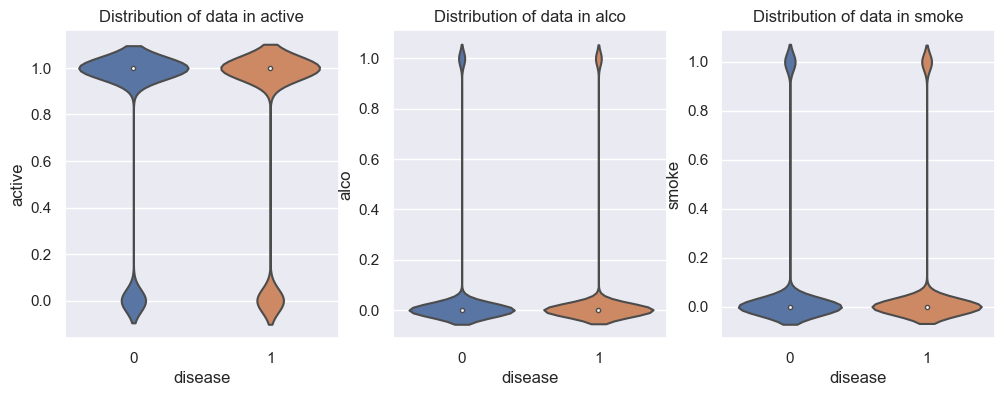

In [11]:
fig, axes = plt.subplots(1,3, figsize=(12,4))

v1 = sns.violinplot(x=df['disease'],y=df['active'],ax=axes[0],legend=False)
axes[0].set_title('Distribution of data in active')

v2 = sns.violinplot(x=df['disease'],y=df['alco'],ax=axes[1],legend=False)
axes[1].set_title('Distribution of data in alco')

v3 = sns.violinplot(x=df['disease'],y=df['smoke'],ax=axes[2],legend=False)
axes[2].set_title('Distribution of data in smoke')
plt.show()

There don't seem to be many patients who are non-active, consume alcohol or smoke.<br>

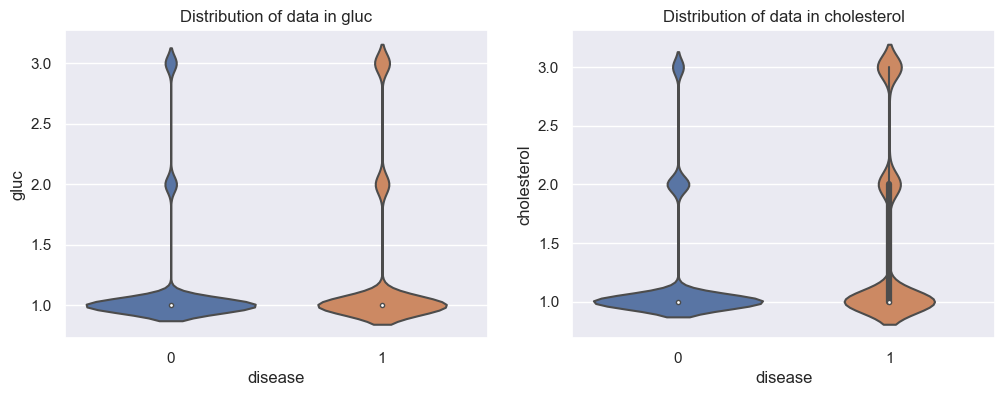

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

v4 = sns.violinplot(x=df['disease'],y=df['gluc'],ax=axes[0],legend=False)
axes[0].set_title('Distribution of data in gluc')

v5 = sns.violinplot(x=df['disease'],y=df['cholesterol'],ax=axes[1],legend=False)
axes[1].set_title('Distribution of data in cholesterol')
plt.show()

In the dataset, most patients tend to skew to having healthier levels of cholesterol and glucose

## Correlation <a id="s5"></a>

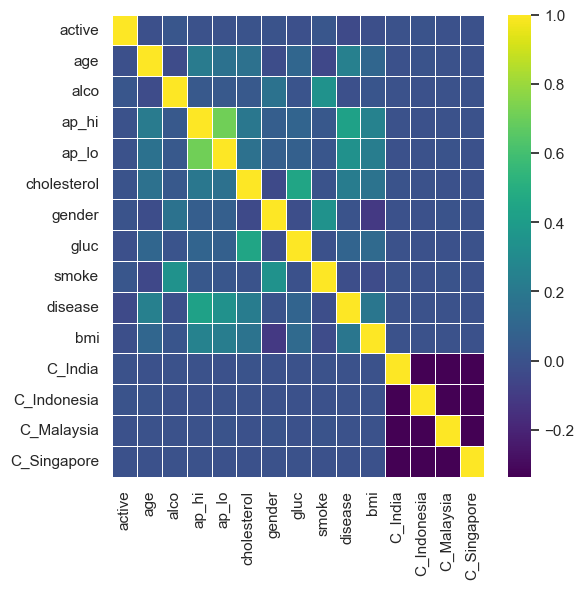

In [13]:
corr = df.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=False, cmap='viridis',linewidth=.5) 
plt.show()

As there are quite a few columns, so it is difficult to see, will try to filter the data

In [14]:
df.corr().unstack().sort_values(ascending = False)['disease']

disease        1.000000
ap_hi          0.429061
ap_lo          0.335918
age            0.239443
cholesterol    0.220466
bmi            0.187375
gluc           0.087968
gender         0.005122
C_Indonesia    0.002679
C_India        0.000617
C_Malaysia    -0.000287
C_Singapore   -0.002997
alco          -0.010027
smoke         -0.017707
active        -0.037402
dtype: float64

We can glean the following information<br>

- blood pressure levels seem to have a better correlation with disease presence
- Age, bmi, cholestrol, gluc have a weak correlation
- The rest show close to no correlation.

<br>
<br>

Let's look at how age correlates with presence of cardiovascular disease again

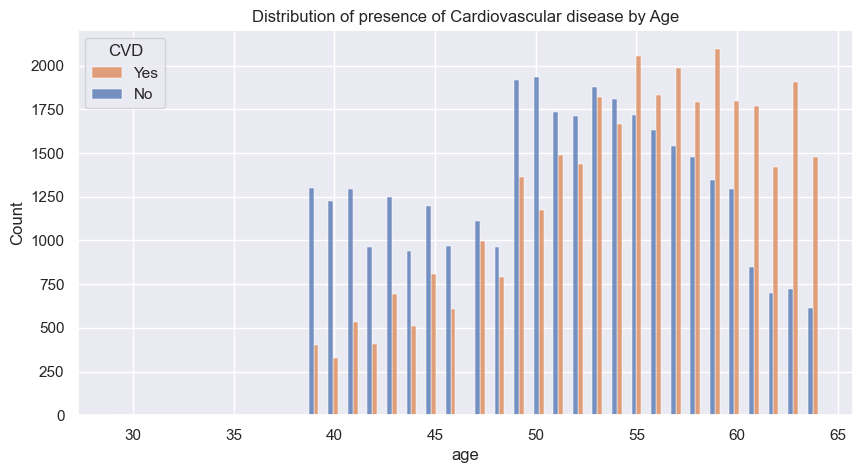

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],hue=df['disease'],multiple='dodge')
plt.legend(title='CVD', loc='upper left', labels=['Yes','No'])
plt.title('Distribution of presence of Cardiovascular disease by Age')
plt.show()

In our data, it does seem that the age is skewed to an older population, and thus we are not able to see any proper or strong correlation.

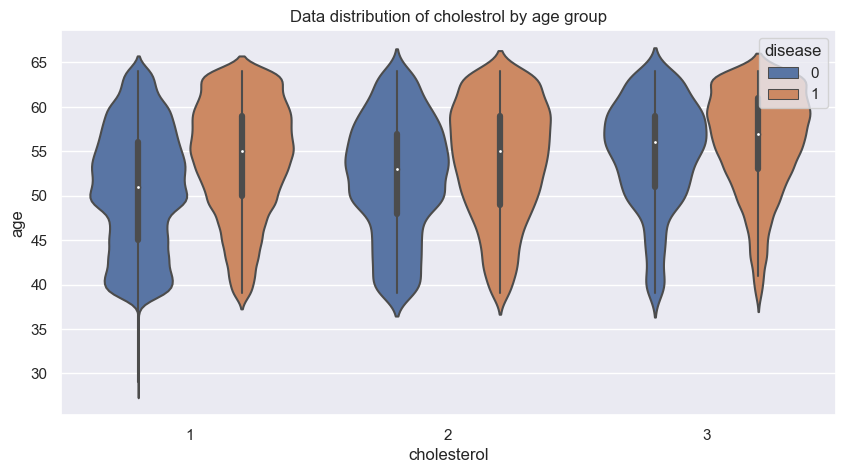

In [16]:
plt.figure(figsize=(10,5))

sns.violinplot(data=df,x='cholesterol',y='age',hue='disease')
plt.title('Data distribution of cholestrol by age group')

plt.show()

There does seem to be some correlation, as cholesterol groups 2 and 3 (borderline and high) seem to have a slightly higher occurence of populations with CVD.

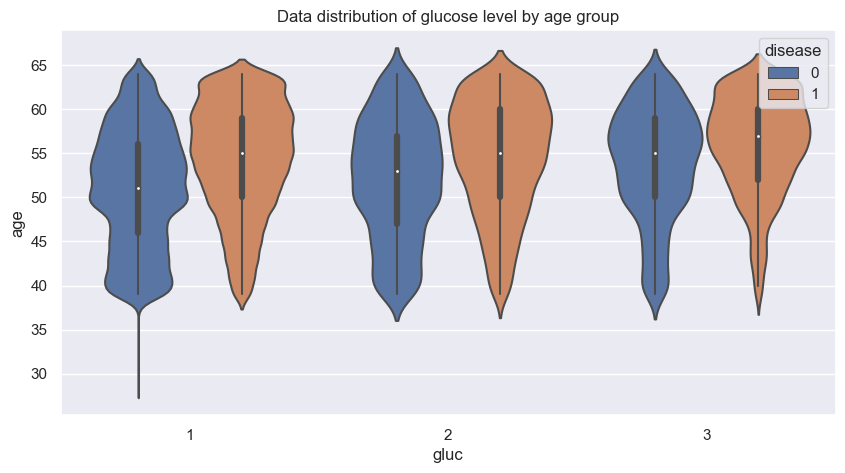

In [17]:
plt.figure(figsize=(10,5))

sns.violinplot(data=df,x='gluc',y='age',hue='disease')
plt.title('Data distribution of glucose level by age group')

plt.show()

Similar distribution is seen with gluc as well

# Split Data <a id="s6"></a>

For ease let's drop the columns that did not show any correlation to disease.

In [18]:
df = df.drop(['C_Indonesia','C_India','C_Malaysia','C_Singapore','alco','smoke','gender'],axis=1)
df.head()

,active,age,ap_hi,ap_lo,cholesterol,gluc,disease,bmi
0,1,50,110,80,1,1,0,21.97
1,1,55,140,90,3,1,1,34.93
2,0,51,130,70,3,1,1,23.51
3,1,48,150,100,1,1,1,28.71
4,0,47,100,60,1,1,0,23.01


In [19]:
X = df.drop('disease',axis=1)
y = df['disease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (53792, 7)
Test Shape (13449, 7)


In [21]:
display(X_train[0:5])
display(y_train[0:4])
display(X_test[0:4])
display(y_test[0:4])

,active,age,ap_hi,ap_lo,cholesterol,gluc,bmi
51107,1,62,130,80,1,1,27.18
51637,1,53,110,70,1,1,32.05
55812,1,50,120,80,1,1,23.45
38683,1,47,100,60,1,1,25.24
2542,1,54,120,70,1,1,32.79


51107    1
51637    0
55812    1
38683    0
Name: disease, dtype: int64

,active,age,ap_hi,ap_lo,cholesterol,gluc,bmi
61389,1,61,120,80,3,3,32.85
65068,1,64,130,80,1,1,26.29
46665,1,41,120,80,1,1,24.16
61901,1,62,150,90,2,1,34.77


61389    1
65068    0
46665    0
61901    1
Name: disease, dtype: int64

# Train and test model <a id="s7"></a>

Will first create a function to evaluate the accuracy of the models

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score,classification_report, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold



In [23]:
model_acc_compile ={"Name":[],"CVS":[],"Accuracy":[],"f1":[],}
def performance (model,name):
    y_pred=model.predict(X_test)
    #crossvalidation scores
    kfold = KFold(10,shuffle=True,random_state=1)
    cvs = cross_val_score(model, X, y,cv=kfold)
    print('{:.2%} accuracy with a standard deviation of {:.2f}'.format(cvs.mean(),cvs.std()))
    acc=balanced_accuracy_score(y_test,y_pred)
    print("Accuracy of the model is: {:.2%}".format(acc))
    f1s=f1_score(y_test,y_pred,average='weighted')
    print('f1 score of {:.2} with a standard deviation of {:.2f}'.format(f1s.mean(),f1s.std()))
    cmx=confusion_matrix(y_test,y_pred)
    model_acc_compile["Name"].append(name)
    model_acc_compile["CVS"].append(cvs.mean())
    model_acc_compile["Accuracy"].append(acc)
    model_acc_compile["f1"].append(f1s.mean())
    disp = ConfusionMatrixDisplay(confusion_matrix=cmx)
    disp.plot()
    plt.show()

## Logistic Regression <a id="s9"></a>

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

71.61% accuracy with a standard deviation of 0.01
Accuracy of the model is: 72.24%
f1 score of 0.72 with a standard deviation of 0.00


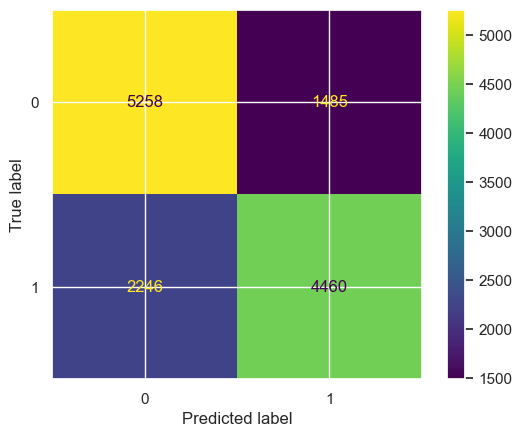

In [25]:
performance(log,'LogReg')

## k-Nearest Neighbor <a id="s10"></a>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn7= KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
knn5= KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

69.24% accuracy with a standard deviation of 0.00
Accuracy of the model is: 69.43%
f1 score of 0.69 with a standard deviation of 0.00


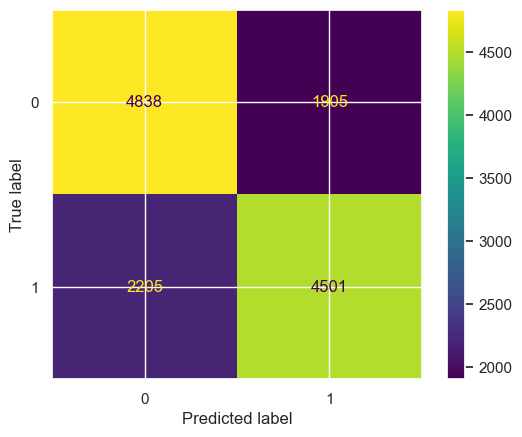

In [29]:
performance(knn5,'kNN n5')

70.27% accuracy with a standard deviation of 0.00
Accuracy of the model is: 70.30%
f1 score of 0.7 with a standard deviation of 0.00


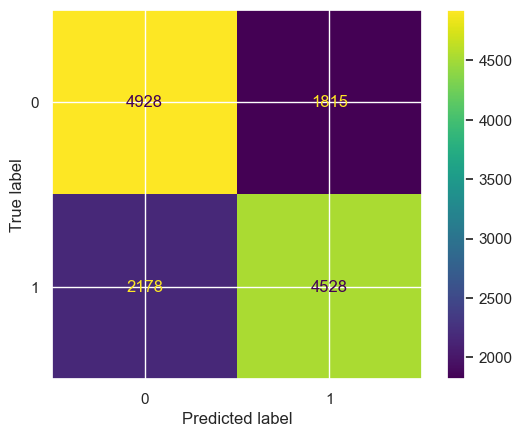

In [30]:
performance(knn7,'kNN n7')

## SVM <a id="s11"></a>

In [31]:
from sklearn.svm import SVC

72.26% accuracy with a standard deviation of 0.00
Accuracy of the model is: 71.85%
f1 score of 0.72 with a standard deviation of 0.00


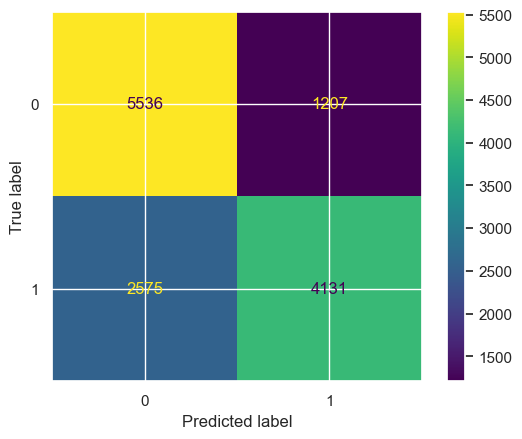

In [32]:
svc=SVC()   

svc.fit(X_train,y_train) 

performance(svc,'SVM')


## Decision Tree Classifier <a id="s12"></a>

In [33]:
from sklearn.tree import DecisionTreeClassifier

64.11% accuracy with a standard deviation of 0.00
Accuracy of the model is: 63.63%
f1 score of 0.64 with a standard deviation of 0.00


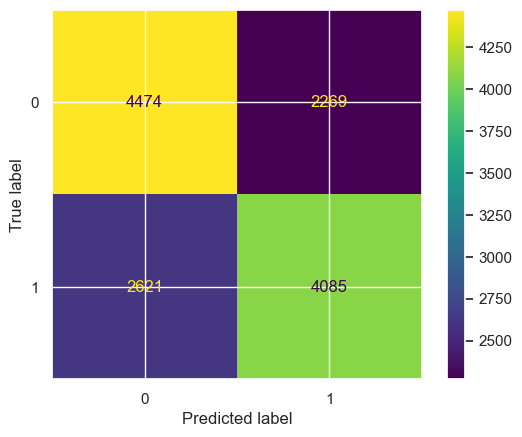

In [34]:
tree= DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)

performance(tree,'DecTree')

## Random Forest <a id="s13"></a>

In [35]:
from sklearn.ensemble import RandomForestClassifier

67.57% accuracy with a standard deviation of 0.00
Accuracy of the model is: 67.40%
f1 score of 0.67 with a standard deviation of 0.00


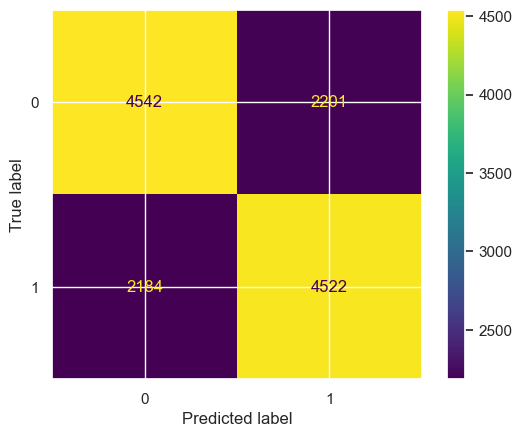

In [36]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)
performance(rand_forest,'Rand Forest')


## Gaussian NB <a id="s14"></a>

71.12% accuracy with a standard deviation of 0.00
Accuracy of the model is: 70.86%
f1 score of 0.71 with a standard deviation of 0.00


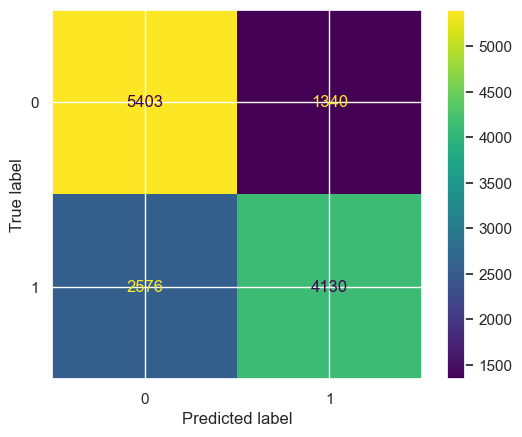

In [37]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)
performance(NBclassifier2,'Gau NB')

# Compare the models <a id="s15"></a>

In [38]:
model_compare = pd.DataFrame.from_dict(model_acc_compile, orient='columns')
compare_melt = pd.melt(model_compare,id_vars=['Name'],value_vars=['CVS','Accuracy','f1'])
compare_melt['value']=round(compare_melt['value']*100,2)
compare_melt.head()



,Name,variable,value
0,LogReg,CVS,71.61
1,kNN n5,CVS,69.24
2,kNN n7,CVS,70.27
3,SVM,CVS,72.26
4,DecTree,CVS,64.11


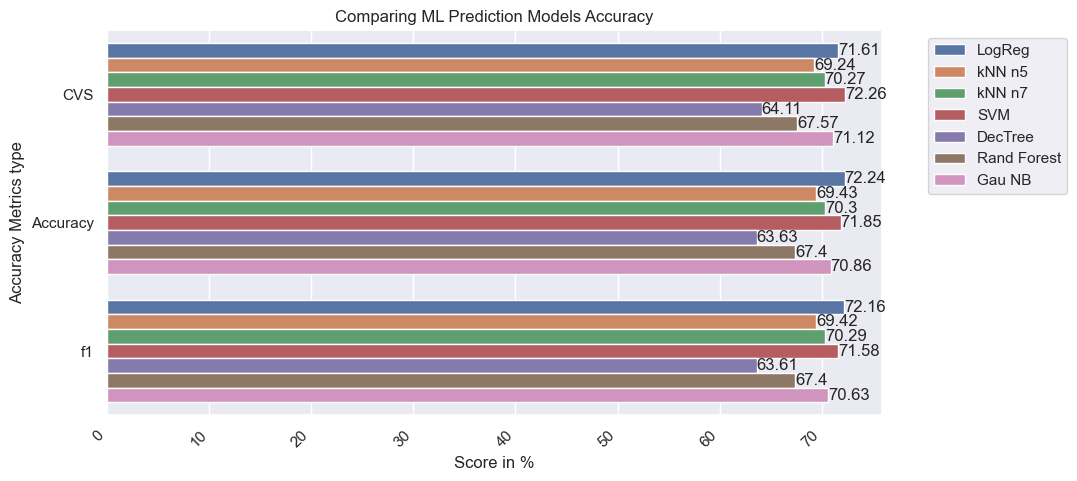

In [39]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=compare_melt,x='value',y='variable',hue='Name')
plt.xticks(rotation=45,horizontalalignment='right')
plt.title("Comparing ML Prediction Models Accuracy")
plt.xlabel('Score in %')
plt.ylabel('Accuracy Metrics type')
plt.legend(bbox_to_anchor=(1.05,1),loc=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The best model in terms of accuracy is the Logistic Regression model.<br>
We can now build a function that returns your risk of CVD.

In [40]:
display(X.iloc[10])
newData = X.iloc[10]
newInput = np.array(newData).reshape(1, -1)
svcpredict = svc.predict(newInput)

def outcome(svcpredict):
    if svcpredict >0.7:
        print("Highly likely to have heart disease")
    elif svcpredict >0.4:
        print("Moderate risk of heart disease")
    else:
        print("Low risk of heart disease")
outcome(svcpredict)

active           1.00
age             61.00
ap_hi          120.00
ap_lo           80.00
cholesterol      1.00
gluc             1.00
bmi             28.01
Name: 10, dtype: float64

Low risk of heart disease
